## Notebook for Data preprocessing, EDA and ML modeling with inference 

In [1]:

""" Data analysis and ML stack modules """

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

### Table of Summaries

1. [Data Preprocessing](#preprocessing)
   
    1.1. [Displaying Rental Data](#display)
   
    1.2. [Handling Missing Values](#missing)


### 1. Data Preprocessing <a class="anchor" id="preprocessing"></a>

#### 1.1. Displaying Rental Data <a class="anchor" id="display"></a>

In [2]:
_DATA_FILE_NAME: str = "mudah-apartment-kl-selangor.csv" # Database file name with format
_DATA_DIR_NAME:  str = "data" # Directory of database
_DATA_FILE_PATH: str = os.path.realpath(
        os.path.os.path.join("..", _DATA_DIR_NAME, _DATA_FILE_NAME)
) # Full filepath of the database relative to the location of notebook

In [3]:
df = pd.read_csv(_DATA_FILE_PATH)

df.head()

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19991 non-null  int64  
 1   prop_name              19043 non-null  object 
 2   completion_year        10806 non-null  float64
 3   monthly_rent           19989 non-null  object 
 4   location               19991 non-null  object 
 5   property_type          19991 non-null  object 
 6   rooms                  19985 non-null  object 
 7   parking                14289 non-null  float64
 8   bathroom               19985 non-null  float64
 9   size                   19991 non-null  object 
 10  furnished              19986 non-null  object 
 11  facilities             17782 non-null  object 
 12  additional_facilities  14043 non-null  object 
 13  region                 19991 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.1+

In [26]:
print(f"Number of entries  : {df.shape[0]}")
print(f"Number of features : {df.shape[1]}")

Number of entries  : 19991
Number of features : 14


#### 1.2. Handling Missing Values

In [25]:
missing_values = pd.DataFrame(df.isnull().sum(), columns=["missing"])

missing_values["relative_freq"] = ((missing_values.missing / df.shape[0]) * 100).round(2)
missing_values.sort_values(by="relative_freq", ascending=False)

,missing,relative_freq
completion_year,9185,45.95
additional_facilities,5948,29.75
parking,5702,28.52
facilities,2209,11.05
prop_name,948,4.74
rooms,6,0.03
furnished,5,0.03
bathroom,6,0.03
monthly_rent,2,0.01
ads_id,0,0.00


<Axes: >

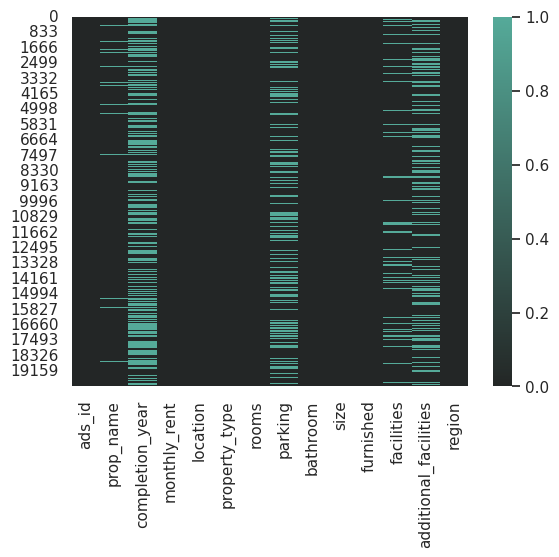

In [49]:
sns.heatmap(df.isnull(), cmap=sns.color_palette("dark:#5A9", as_cmap=True))

<Axes: >

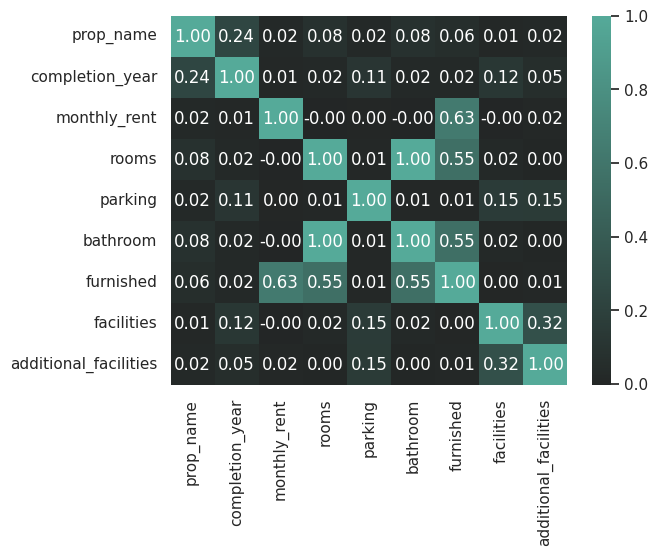

In [65]:
sns.heatmap(df.loc[:, df.isnull().any()].isnull().corr(), annot=True, fmt=".2f", cmap=sns.color_palette("dark:#5A9", as_cmap=True))